The A(+) Team 

Team Members (in order of importance): Hamza, Ayca, Rena 

Date: February 2021 

In [2]:
#Initial imports 

import pandas as pd 
import numpy as np 
import datetime as dt 
import matplotlib.dates as mdates 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline


In [3]:
#Read in and clean the data

#Read in Bitcoin Data 

btc_df = pd.read_csv("BTC-USD.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
btc_df = btc_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns 
btc_df = btc_df.rename(columns={'Close':'BTC'}) #rename close column to BTC

#Read in Ethereum Data 
eth_df = pd.read_csv("ETH-USD.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
eth_df = eth_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns 
eth_df = eth_df.rename(columns={'Close':'ETH'}) #rename close column to ETH

#Read in Gold Futures Prices 
gold_df = pd.read_csv("Gold Futures Prices.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
gold_df = gold_df.drop(columns=["Vol.", "Open", "High", "Low", "Change %"]) #Keep relevant columns 
gold_df = gold_df.rename(columns={'Price':'GOLD'}) #rename close column to GOLD

#Read in Dow Jones Data 
dj_df = pd.read_csv("Dow Jones Historical Data.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
dj_df = dj_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns
dj_df = dj_df.rename(columns={'Close':'DOW'}) #rename close column to Dow

#Read in Brazilian index Data 
brz_df = pd.read_csv("Brazilian Index Prices.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
brz_df = brz_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns
brz_df = brz_df.rename(columns={'Close':'BRZ'}) #rename close column to Brazil
                              
#Read in Ressel 2000 Index 
r2000_df = pd.read_csv("Russel 2000 Index .csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
r2000_df = r2000_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])#Keep relevant columns
r2000_df = r2000_df.rename(columns={'Close':'R2000'}) #rename close column to R2000

#Read in TSX Data 
tsx_df = pd.read_csv("TSX Historical Data.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
tsx_df = tsx_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])#Keep relevant columns
tsx_df = tsx_df.rename(columns={'Close':'TSX'}) #rename close column to TSX

#Read in S&P 500 Data 
sp500_df = pd.read_csv("S_P 500.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df = sp500_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])#Keep relevant columns
sp500_df = sp500_df.rename(columns={'Close':'SP500'}) #rename close column to sp500

In [4]:
#Concatenate Data

combined_df = pd.concat([btc_df, eth_df, gold_df, dj_df, brz_df, r2000_df, tsx_df, sp500_df],axis="columns", join="inner")
combined_df.dtypes

BTC      float64
ETH      float64
GOLD      object
DOW      float64
BRZ      float64
R2000    float64
TSX      float64
SP500    float64
dtype: object

In [5]:
#Change Data type of "Gold" to float instead of object 

combined_df['GOLD'] = combined_df['GOLD'].str.replace(',', '')
combined_df['GOLD'] = combined_df['GOLD'].astype('float')



In [6]:
#Calculate daily returns 

combined_returns = combined_df.pct_change().dropna()


Text(0, 0.5, 'Daily Returns %')

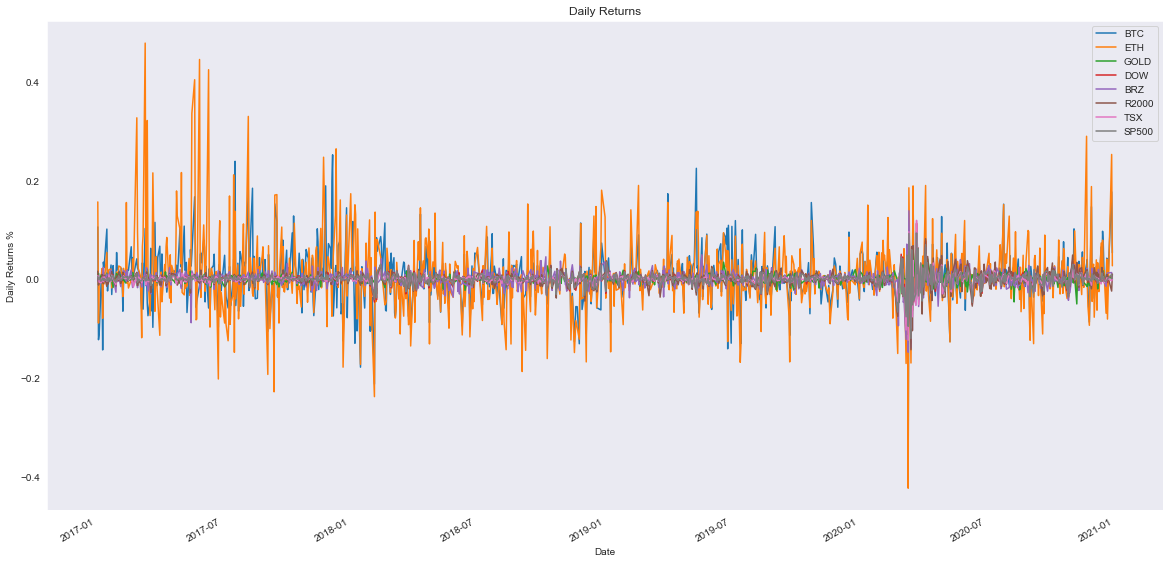

In [7]:
#Plot Daily returns 
sns.set_style("dark")
combined_returns.plot(figsize=(20,10))
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns %")

In [8]:
#Calculate cumulative returns of all portfolios 

cumulative_returns = (1 + combined_returns).cumprod() 
cumulative_returns

,BTC,ETH,GOLD,DOW,BRZ,R2000,TSX,SP500
Date,,,,,,,,
2017-01-04,1.106233,1.156947,1.001928,1.003038,0.996360,1.016448,1.007388,1.005722
2017-01-05,0.970819,1.054410,1.013979,1.000882,1.004158,1.004724,1.011920,1.004947
2017-01-06,0.864310,1.054441,1.008837,1.004126,0.997590,1.001311,1.006044,1.008482
2017-01-09,0.864910,1.061731,1.018398,1.000283,0.998156,0.994141,0.999091,1.004903
2017-01-10,0.869558,1.084764,1.019121,0.998681,1.005144,1.003962,1.001513,1.004903
...,...,...,...,...,...,...,...,...
2020-12-21,21.845381,62.704596,1.512654,1.519808,1.876856,1.442947,1.136201,1.636492
2020-12-22,22.784172,65.278958,1.502611,1.509701,1.882227,1.457264,1.139551,1.633099
2020-12-23,22.265238,60.020524,1.508878,1.515451,1.906639,1.469875,1.142219,1.634317


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

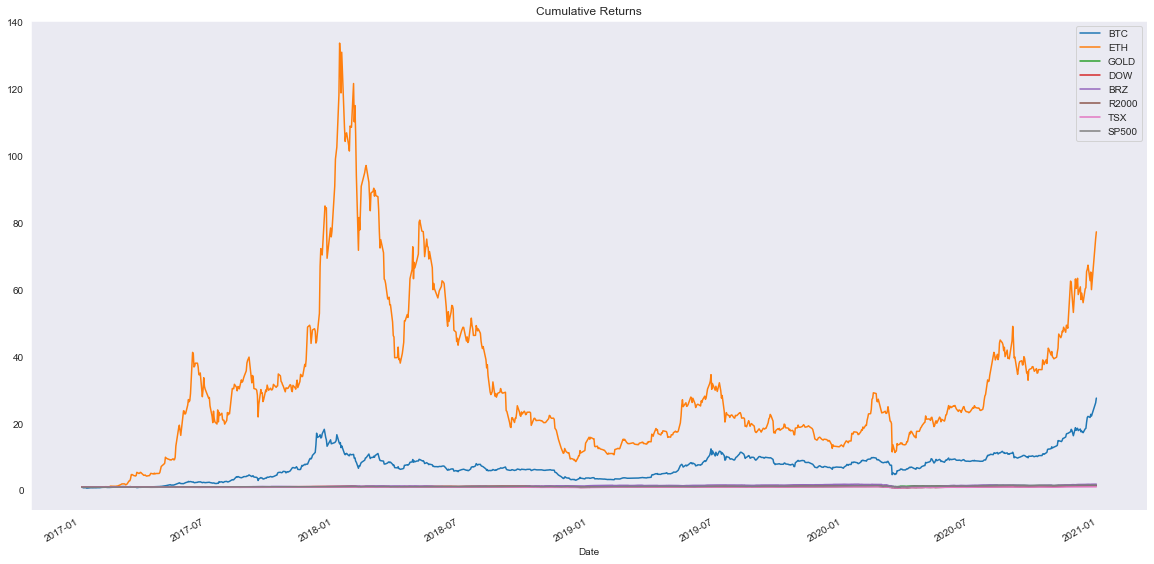

In [9]:
#Plot cumulative returns 

cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

<AxesSubplot:>

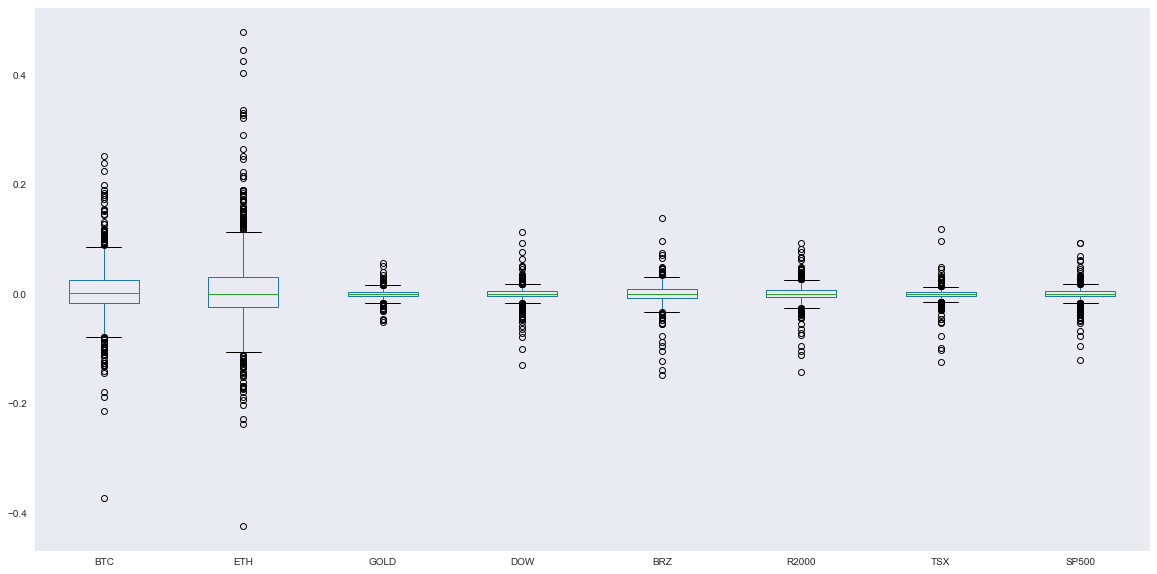

In [10]:
#Create Box Plot to show risk

combined_returns.plot.box(figsize=(20,10))

In [11]:
#Calculate Correlation 
correlation = combined_returns.corr()


<AxesSubplot:>

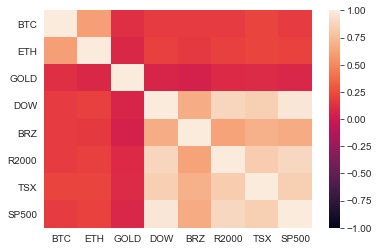

In [12]:
#Display the correlation matrix 

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [13]:
combined_returns.head()

,BTC,ETH,GOLD,DOW,BRZ,R2000,TSX,SP500
Date,,,,,,,,
2017-01-04,0.106233,0.156947,0.001928,0.003038,-0.003640,0.016448,0.007388,0.005722
2017-01-05,-0.122410,-0.088627,0.012028,-0.002150,0.007826,-0.011535,0.004498,-0.000771
2017-01-06,-0.109711,0.000029,-0.005071,0.003242,-0.006541,-0.003397,-0.005806,0.003517
2017-01-09,0.000695,0.006914,0.009477,-0.003828,0.000568,-0.007160,-0.006911,-0.003549
2017-01-10,0.005373,0.021694,0.000710,-0.001602,0.007002,0.009879,0.002424,0.000000


In [14]:
#combined monthly returns 

monthly_returns = combined_df.resample("M").ffill().pct_change().dropna()


In [15]:
#Calculate the monthly percentage changes 

monthly_returns

,BTC,ETH,GOLD,DOW,BRZ,R2000,TSX,SP500
Date,,,,,,,,
2017-02-28,0.209477,0.218289,0.036074,0.048211,0.030787,0.024012,0.009587,0.038822
2017-03-31,-0.086812,2.828643,-0.006426,-0.007614,-0.025172,-0.006167,0.000921,-0.001952
2017-04-30,0.228300,0.402138,0.013009,0.013419,0.006448,0.010470,0.002463,0.009091
2017-05-31,0.736760,2.287794,0.001039,0.003254,-0.041160,-0.021579,-0.015154,0.011576
2017-06-30,0.085037,0.278525,-0.025584,0.016230,0.003014,0.032951,-0.010925,0.004814
2017-07-31,0.159019,-0.308715,0.020320,0.025363,0.048013,0.006910,-0.002523,0.019349
2017-08-31,0.635768,0.878845,0.035653,0.002603,0.074560,-0.013935,0.004490,0.000546
2017-09-30,-0.114879,-0.239073,-0.022254,0.020821,0.048832,0.060899,0.027807,0.019303
2017-10-31,0.553757,0.049446,-0.007292,0.043390,0.000188,0.007828,0.024989,0.022188


In [16]:
#Calculating Monthly Correlation

correlation_m = monthly_returns.corr()

<AxesSubplot:>

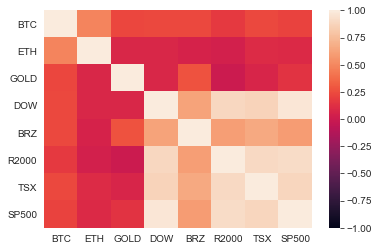

In [17]:
#Showing correlation matrix for monthly returns

sns.heatmap(correlation_m, vmin=-1, vmax=1)

In [18]:
#Get monthly returns only for 2020 

monthly_r_2020 = monthly_returns.loc["2019-12-31" : "2020-12-31"]

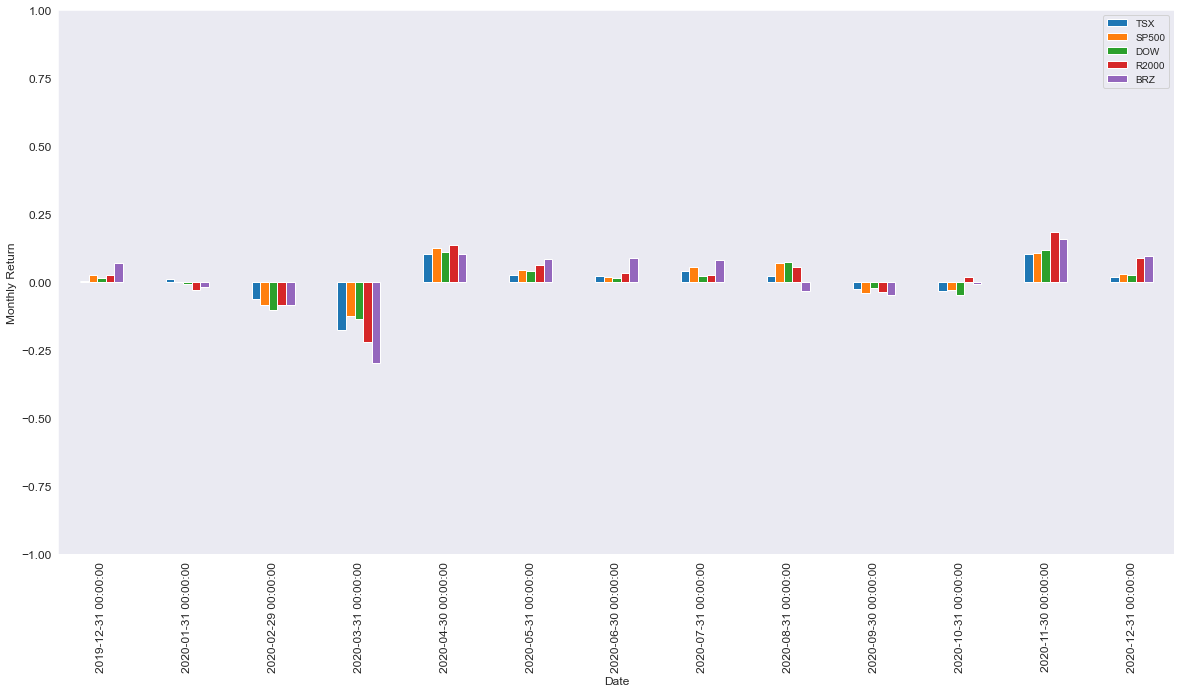

In [19]:
#COVID EXAMINATION - MONTHLY RETURNS CONSISTENT IN ACROSS MAJOR MARKETS IN 2020 

ax = monthly_r_2020[["TSX", "SP500", "DOW", "R2000", "BRZ"]].plot(kind = "bar", figsize=(20,10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Monthly Return", fontsize=12)
ax.set_ylim([-1, 1])
plt.show()

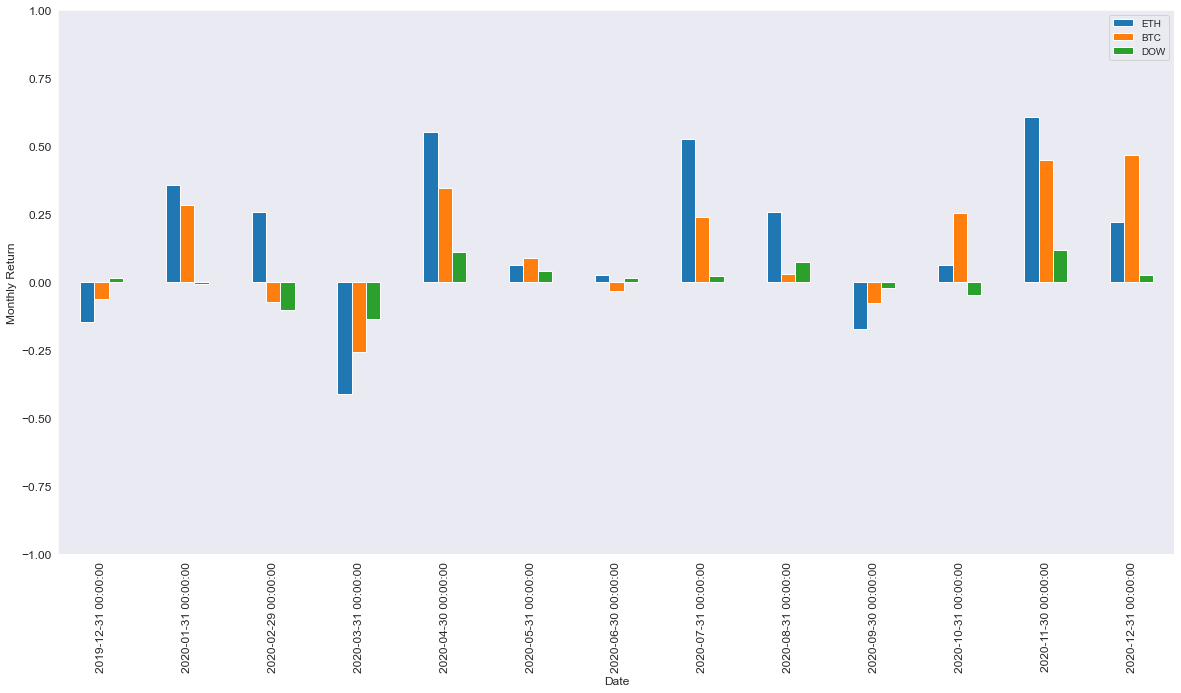

In [20]:
#COVID EXAMINATION - HOW DID CRYPTO RETURNS COMPARE TO DOW IN 2020 

ax = monthly_r_2020[["ETH", "BTC", "DOW"]].plot(kind = "bar", figsize=(20,10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Monthly Return", fontsize=12)
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_ylim([-1, 1])
plt.show()

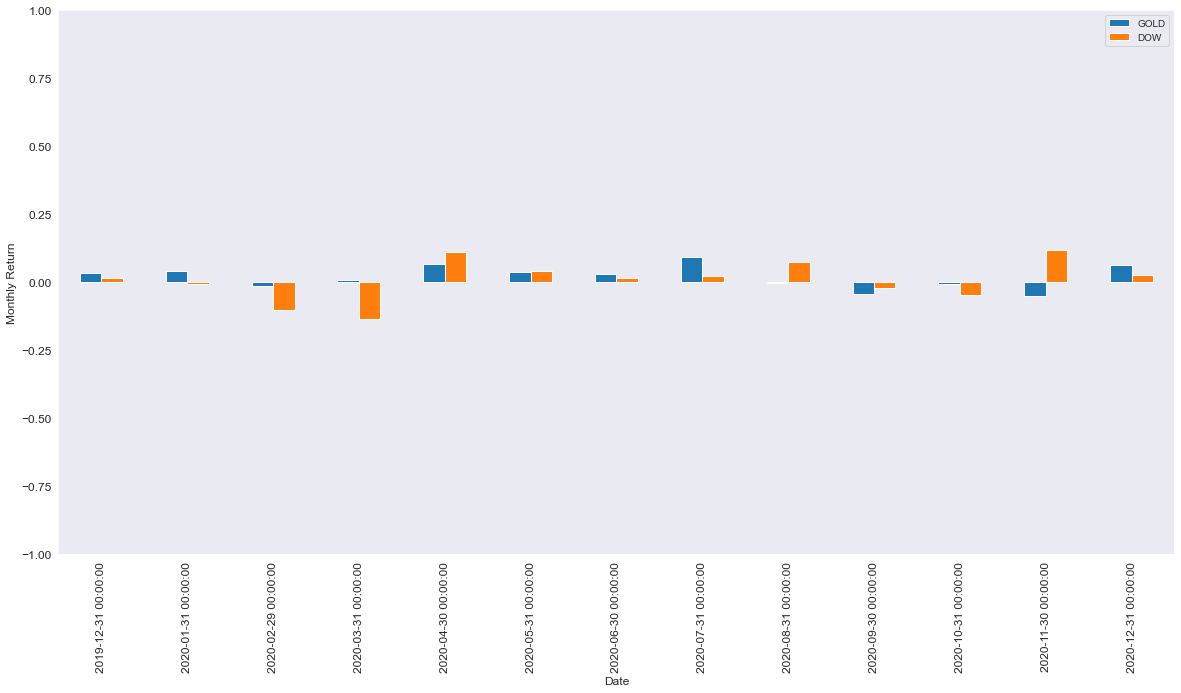

In [21]:
#COVID EXAMINATION - HOW DID GOLD RETURNS COMPARE TO DOW

ax = monthly_r_2020[["GOLD", "DOW"]].plot(kind = "bar", figsize=(20,10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Monthly Return", fontsize=12)
ax.set_ylim([-1, 1])
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

In [22]:
#Combined Returns 

combined_returns.head()

,BTC,ETH,GOLD,DOW,BRZ,R2000,TSX,SP500
Date,,,,,,,,
2017-01-04,0.106233,0.156947,0.001928,0.003038,-0.003640,0.016448,0.007388,0.005722
2017-01-05,-0.122410,-0.088627,0.012028,-0.002150,0.007826,-0.011535,0.004498,-0.000771
2017-01-06,-0.109711,0.000029,-0.005071,0.003242,-0.006541,-0.003397,-0.005806,0.003517
2017-01-09,0.000695,0.006914,0.009477,-0.003828,0.000568,-0.007160,-0.006911,-0.003549
2017-01-10,0.005373,0.021694,0.000710,-0.001602,0.007002,0.009879,0.002424,0.000000


In [24]:
#Covid Dataframe 

covid_df = combined_returns.loc["2020-03-01" : "2020-03-31" ]

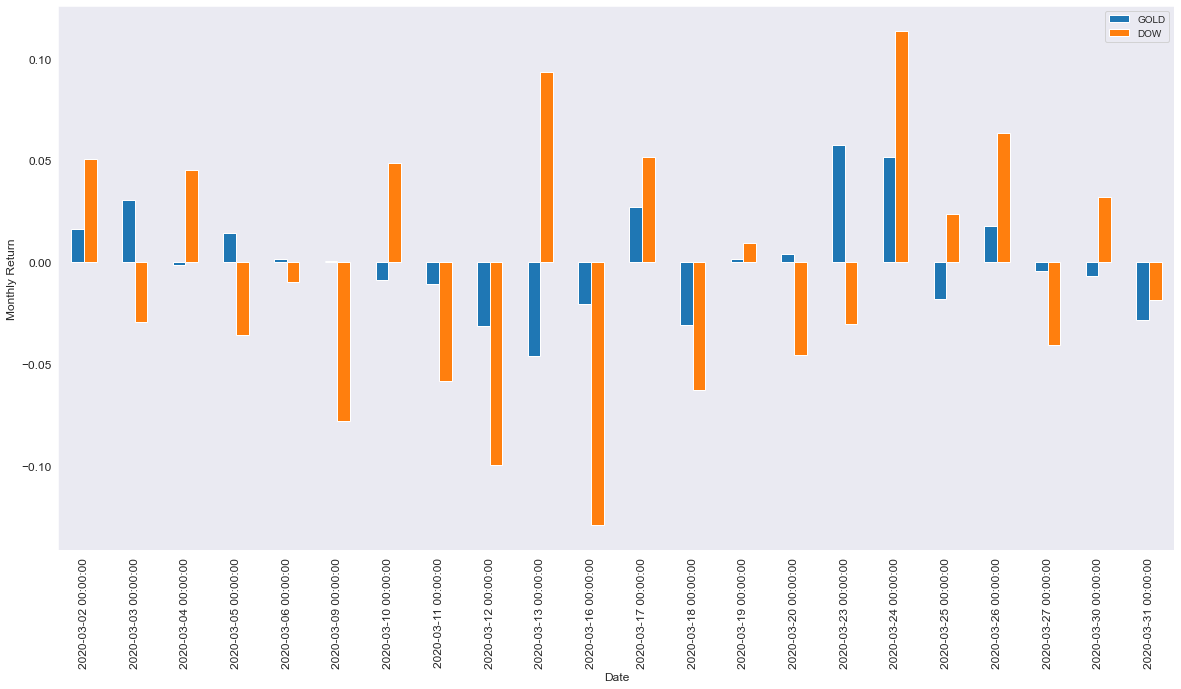

In [27]:
#Gold vs DOW Jones in COVID 

ax = covid_df[["GOLD", "DOW"]].plot(kind = "bar", figsize=(20,10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Monthly Return", fontsize=12)
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

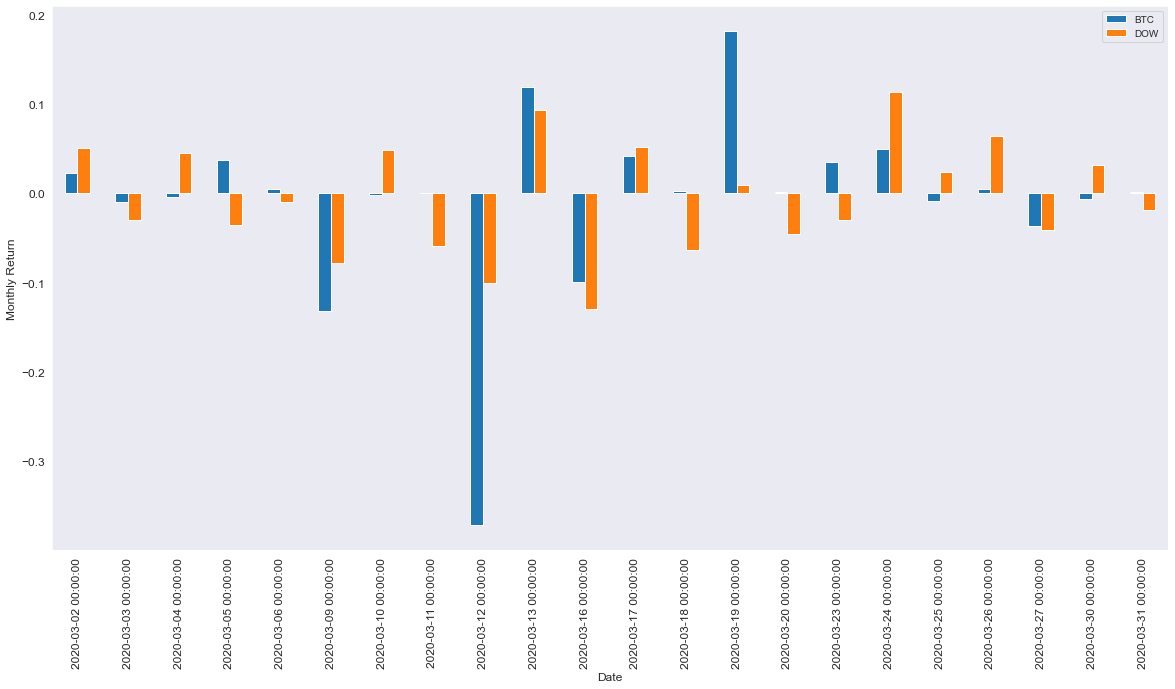

In [28]:
#Gold vs DOW Jones in COVID 

ax = covid_df[["BTC", "DOW"]].plot(kind = "bar", figsize=(20,10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Monthly Return", fontsize=12)
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

In [29]:
correlation_covid = covid_df.corr()

<AxesSubplot:>

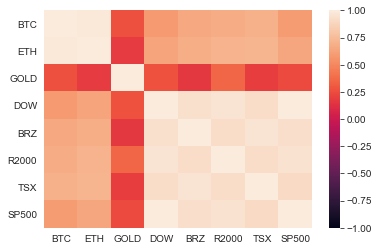

In [30]:
sns.heatmap(correlation_covid, vmin=-1, vmax=1)

In [31]:
btc_df = combined_returns.loc["2020-08-01" : "2020-12-31" ]

In [32]:
btc_df.head()

,BTC,ETH,GOLD,DOW,BRZ,R2000,TSX,SP500
Date,,,,,,,,
2020-08-04,-0.010383,0.128260,0.017675,0.015141,-0.016480,0.024844,0.012295,0.010819
2020-08-05,0.048290,0.030048,0.014003,0.013905,0.015669,0.019134,0.008162,0.006430
2020-08-06,0.002788,-0.016506,0.009808,0.006818,0.012879,-0.001048,0.004697,0.006428
2020-08-07,-0.015136,-0.039115,-0.020006,0.001698,-0.012965,0.015900,-0.002087,0.000633
2020-08-10,0.023845,0.043147,0.005769,0.013048,0.006500,0.009871,0.003687,0.002742


In [33]:
correlation_btc = btc_df.corr()

<AxesSubplot:>

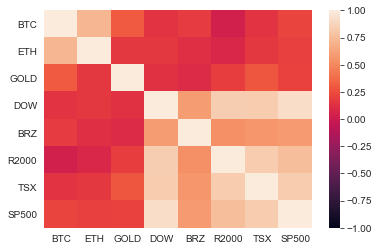

In [34]:
sns.heatmap(correlation_btc, vmin=-1, vmax=1)

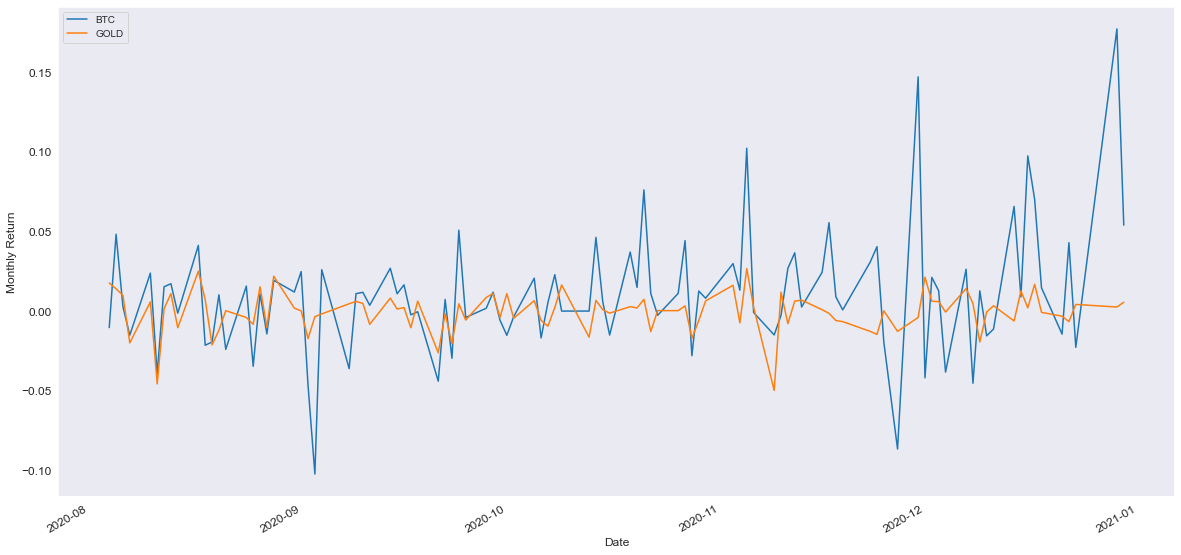

In [37]:
ax = btc_df[["BTC", "GOLD"]].plot(figsize=(20,10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Monthly Return", fontsize=12)
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

In [38]:
#Speculation Time 

spc_df = combined_returns.loc["2017-01-01" : "2018-01-01" ]

In [39]:
spc_df.head()

,BTC,ETH,GOLD,DOW,BRZ,R2000,TSX,SP500
Date,,,,,,,,
2017-01-04,0.106233,0.156947,0.001928,0.003038,-0.003640,0.016448,0.007388,0.005722
2017-01-05,-0.122410,-0.088627,0.012028,-0.002150,0.007826,-0.011535,0.004498,-0.000771
2017-01-06,-0.109711,0.000029,-0.005071,0.003242,-0.006541,-0.003397,-0.005806,0.003517
2017-01-09,0.000695,0.006914,0.009477,-0.003828,0.000568,-0.007160,-0.006911,-0.003549
2017-01-10,0.005373,0.021694,0.000710,-0.001602,0.007002,0.009879,0.002424,0.000000


In [46]:
correlation_spc = spc_df.corr()

<AxesSubplot:>

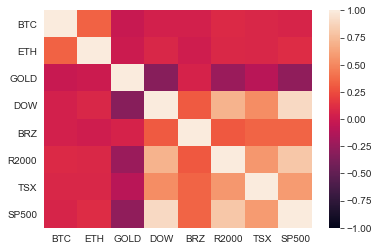

In [48]:
sns.heatmap(correlation_spc, vmin=-1, vmax=1)

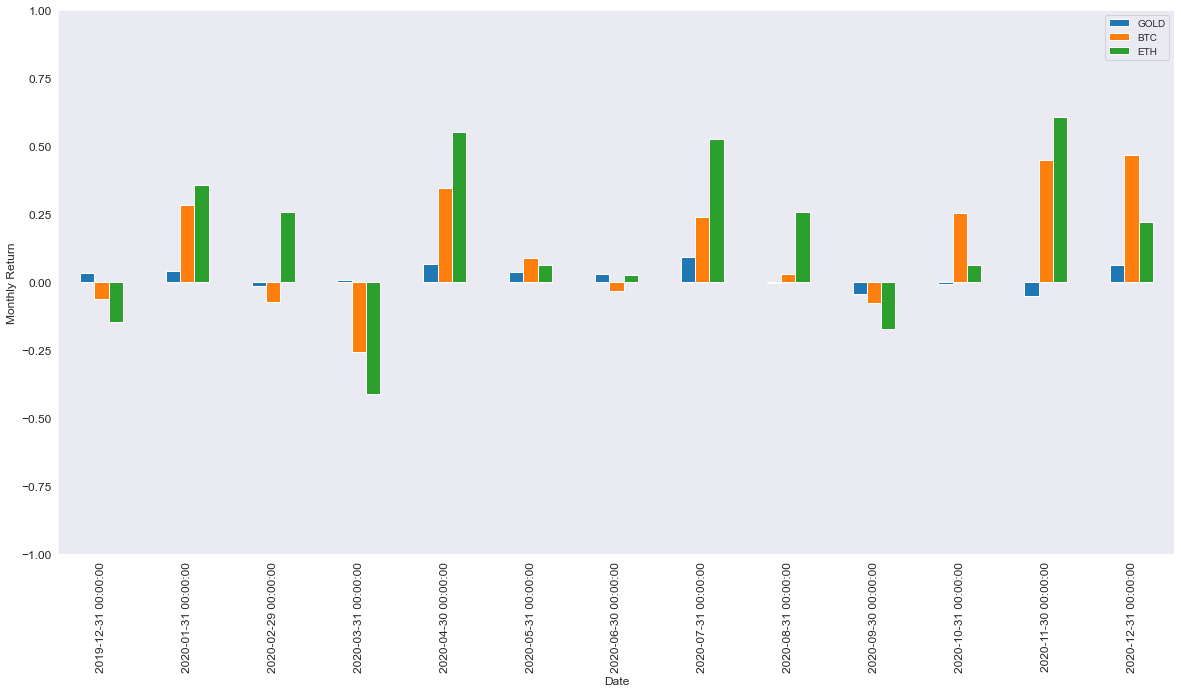

In [49]:
#2020 Monthly returns 

ax = monthly_r_2020[["GOLD", "BTC","ETH"]].plot(kind = "bar", figsize=(20,10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Monthly Return", fontsize=12)
ax.set_ylim([-1, 1])
plt.show()